In [1]:
import pandas as pd
import matplotlib as mpl
import geopandas as gpd
import descartes
import geojson
import json
import altair as alt
import altair_latimes as lat
alt.renderers.enable('notebook')
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

In [2]:
def category20():
    return {
        'config': {
            'range': {'category': {'scheme': 'category20'}}
        }
    }

# Register and enable.
alt.themes.register('category20', category20)
alt.themes.enable('category20')

ThemeRegistry.enable('category20')

In [3]:
pd.options.display.float_format = '{:,}'.format

In [4]:
claims = pd.read_csv('input/claims.csv')
claims.columns = claims.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [5]:
## entry date = when it was received by the board of supervisors
claims['entry_date'] = pd.to_datetime(claims['entry_date'])
claims['year'] = claims['entry_date'].dt.year
claims['month'] = claims['entry_date'].dt.month
claims['coverage_detail_desc'] = claims['coverage_detail_desc'].str.capitalize().str.replace('liability','')
claims['department_name'] = claims['department_name'].str.title()
claims['case_name'] = claims['case_name'].str.title()
claims['claimant_name'] = claims['claimant_name'].str.title()

In [6]:
claims.columns

Index(['file_number', 'entry_date', 'claimant_name', 'case_number',
       'case_name', 'department_name', 'coverage_detail_desc', 'amount_paid',
       'year', 'month'],
      dtype='object')

In [7]:
claims['amount_paid'] = claims['amount_paid'].astype(float)

### How much have county department's paid during the decade?

In [8]:
department_totals = claims.groupby('department_name').agg({'amount_paid': 'sum'}).sort_values('amount_paid', ascending=False).reset_index()

In [9]:
department_totals = department_totals[department_totals.amount_paid > 1000000]

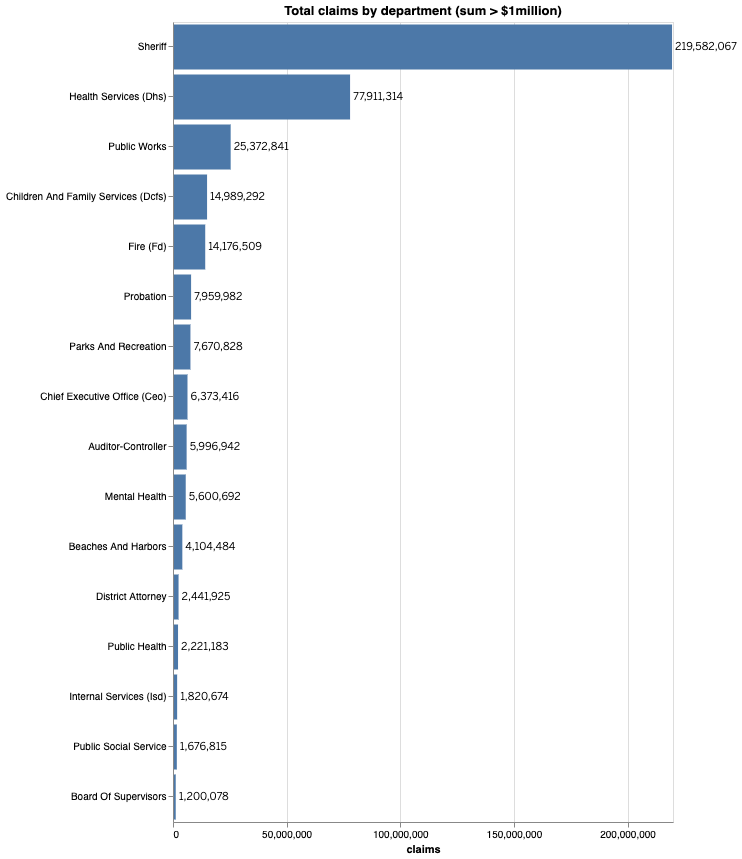

In [10]:
bars = alt.Chart(department_totals, title="Total claims by department (sum > $1million)").mark_bar().encode(
    x=alt.X('amount_paid:Q',title="claims",axis=alt.Axis(format=',S', tickCount=6)),
    y=alt.Y(
        'department_name:N',
        title="",
        sort=alt.EncodingSortField(
            field="amount_paid",  # The field to use for the sort
            op="sum",  # The operation to run on the field prior to sorting
            order="descending",  # The order to sort in
        )
    )
)

text = bars.mark_text(
    align='left',
    font='Benton Gothic',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('amount_paid:Q', format=",")
)
    
(bars + text).properties(height=800, width=500)

In [11]:
claims.reset_index()

,index,file_number,entry_date,claimant_name,case_number,case_name,department_name,coverage_detail_desc,amount_paid,year,month
0,0,08-1062459*001,2008-07-08,"Casillas, Nancy",NaN,NaN,Sheriff,Police /law enforcement,"2,500.0",2008,7
1,1,08-1062544*001,2008-07-11,"Oviedo, Mike",BC424278,"Oviedo, Mike Vs Brill, Rene; Et Al",Public Works,Auto,"44,197.0",2008,7
2,2,08-1062613*001,2008-07-15,"Bernardez, Taurean",NaN,NaN,Sheriff,Police /law enforcement,500.0,2008,7
3,3,08-1062703*001,2008-07-18,"Werner, Elaine Fay",NaN,NaN,District Attorney,Auto,119.0,2008,7
4,4,08-1062866*001,2008-07-24,"Lopez, Jessica",NaN,NaN,Mental Health,Auto,330.0,2008,7
5,5,08-1062852*001,2008-07-24,"Vega, Nelson Carlo Jr.",NaN,NaN,Health Services (Dhs),Medical malpractice,"12,500.0",2008,7
6,6,08-1062882*001,2008-07-25,"Molina, Maria De Jesus",NaN,NaN,Sheriff,Auto,"4,508.0",2008,7
7,7,08-1062879*001,2008-07-25,"Rivas, Maria Victoria",NaN,NaN,Public Works,Auto,"10,170.0",2008,7
8,8,08-1062904*001,2008-07-28,"Cook, Cynthia A.",NaN,NaN,Sheriff,Police /law enforcement,21.0,2008,7
9,9,08-1062951*001,2008-07-29,"Cooper, Shequito",NaN,NaN,Sheriff,Police /law enforcement,355.0,2008,7


### Selecting data based on the department name

In [12]:
sheriff = claims[claims.department_name == 'Sheriff']
fire = claims[claims.department_name == 'Fire (Fd)']

In [13]:
fire.head()

,file_number,entry_date,claimant_name,case_number,case_name,department_name,coverage_detail_desc,amount_paid,year,month
19,08-1063129*001,2008-08-07,"Waldeck, David",NaN,NaN,Fire (Fd),General,123.0,2008,8
39,08-1063579*001,2008-08-26,"Hauck, Terry",NaN,NaN,Fire (Fd),Auto,"2,730.0",2008,8
56,08-1063816*001,2008-09-10,"Guerrero, Edward",NaN,NaN,Fire (Fd),Auto,256.0,2008,9
72,08-1064105*001,2008-09-19,"Martinez, Cynthia",NaN,NaN,Fire (Fd),Auto,150.0,2008,9
102,08-1064582*001,2008-10-10,"Gordon, Lewis G.",NaN,NaN,Fire (Fd),Auto,416.0,2008,10


### How much did the Sheriff's Department pay each year?

In [14]:
sheriif_year = sheriff.groupby(['year']).agg({'amount_paid': 'sum'}).reset_index().sort_values(['year'], ascending=False).round()

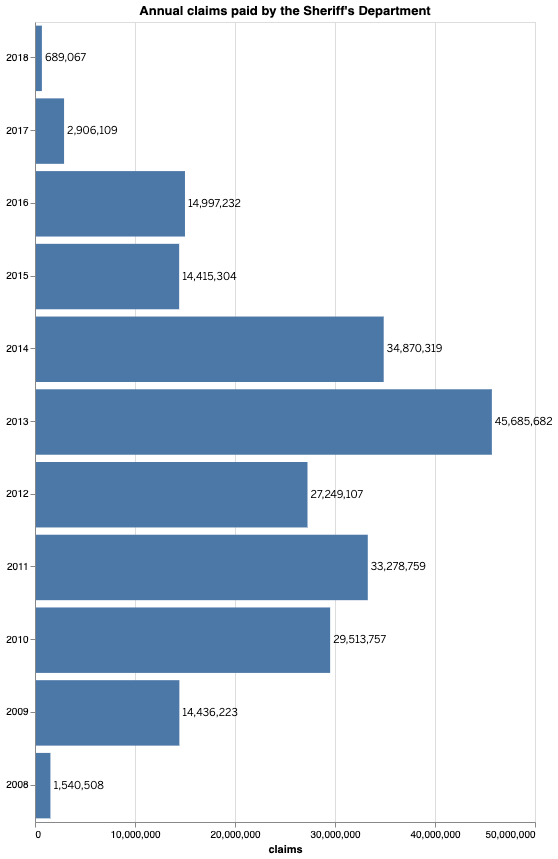

In [15]:
bars = alt.Chart(sheriif_year, title="Annual claims paid by the Sheriff's Department").mark_bar().encode(
    x=alt.X('amount_paid:Q',title="claims",axis=alt.Axis(format=',S', tickCount=6)),
    y=alt.Y(
        'year:N',
        title="",
        sort=alt.EncodingSortField(
            field="year",  # The field to use for the sort
#             op="sum",  # The operation to run on the field prior to sorting
            order="descending",  # The order to sort in
        )
    )
)

text = bars.mark_text(
    align='left',
    font='Benton Gothic, sans',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('amount_paid:Q', format=",")
)
    
(bars + text).properties(height=800, width=500)

### What types of claims has the Fire Department paid?

In [16]:
fire.groupby(['coverage_detail_desc', 'department_name']).agg({'amount_paid': 'sum'}).sort_values('amount_paid', ascending=False).round().reset_index()

,coverage_detail_desc,department_name,amount_paid
0,Medical malpractice,Fire (Fd),"5,563,718.0"
1,Auto,Fire (Fd),"5,162,694.0"
2,Employment practices,Fire (Fd),"3,096,790.0"
3,General,Fire (Fd),"351,802.0"
4,Environmental impairment,Fire (Fd),"1,355.0"
5,Police /law enforcement,Fire (Fd),150.0


In [17]:
sheriff_type = sheriff.groupby(['coverage_detail_desc', 'department_name']).agg({'amount_paid': 'sum'}).sort_values('amount_paid', ascending=False).round().reset_index()

In [18]:
sheriff_type_bars = alt.Chart(sheriff_type, title='').mark_bar().encode(
    x=alt.X('sum(amount_paid)', stack="normalize", title="Share of claims",axis=alt.Axis(format='%', tickCount=6)),
    y=alt.Y('department_name', title=""),
    color=alt.Color('coverage_detail_desc',legend=alt.Legend(title="", orient='top')),
    order=alt.Order('sum(amount_paid)', sort='descending')
).properties(height=50, width=900)
palette = alt.Scale(domain=['coverage_detail_desc'], range=['category20'])

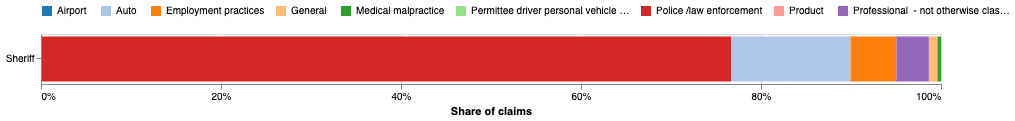

In [19]:
sheriff_type_bars

### What types have claims have ALL departments paid? 

In [20]:
claim_types = claims.groupby('coverage_detail_desc').agg({'amount_paid': 'sum'}).sort_values('amount_paid', ascending=False).round().reset_index()

In [21]:
claim_types_dept = claims.groupby(['coverage_detail_desc', 'department_name']).agg({'amount_paid': 'sum'}).sort_values('amount_paid', ascending=False).round().reset_index()

In [22]:
claim_types

,coverage_detail_desc,amount_paid
0,Police /law enforcement,"171,622,919.0"
1,Medical malpractice,"64,446,426.0"
2,General,"62,517,366.0"
3,Auto,"54,586,955.0"
4,Employment practices,"35,676,687.0"
5,Professional - not otherwise classified,"16,805,522.0"
6,Environmental impairment,"73,455.0"
7,Public officials errors and omissions,"41,061.0"
8,Hospital professional,"21,482.0"
9,Permittee driver personal vehicle damage,"19,762.0"


### Claims payment totals by detail and department

In [23]:
claim_types_dept

,coverage_detail_desc,department_name,amount_paid
0,Police /law enforcement,Sheriff,"168,348,500.0"
1,Medical malpractice,Health Services (Dhs),"56,964,136.0"
2,Auto,Sheriff,"29,165,431.0"
3,General,Public Works,"19,863,831.0"
4,Employment practices,Sheriff,"11,198,427.0"
5,General,Children And Family Services (Dcfs),"9,569,402.0"
6,Employment practices,Health Services (Dhs),"8,102,217.0"
7,Professional - not otherwise classified,Sheriff,"7,912,972.0"
8,General,Chief Executive Office (Ceo),"6,263,448.0"
9,Professional - not otherwise classified,Health Services (Dhs),"6,142,276.0"


### CHART: Claims payment totals by detail and department

In [24]:
claim_types_dept_bars = alt.Chart(claim_types_dept, title='').mark_bar().encode(
    x=alt.X('sum(amount_paid)', stack="normalize", title="Share of claims",axis=alt.Axis(format='%', tickCount=6)),
    y=alt.Y('department_name', title=""),
    color=alt.Color('coverage_detail_desc',legend=alt.Legend(title="", orient='right')),
    order=alt.Order('coverage_detail_desc', sort='ascending')
).properties(height=900, width=500)
palette = alt.Scale(domain=['coverage_detail_desc'], range=['category20'])

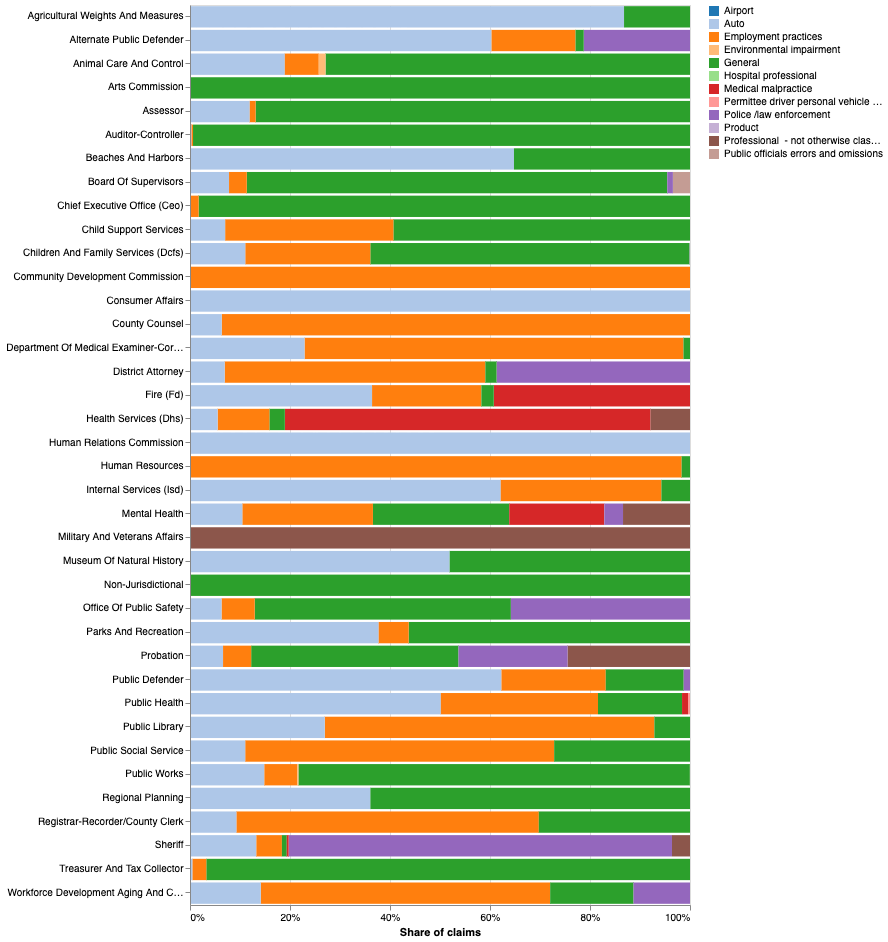

In [25]:
claim_types_dept_bars

### Select Sheriff's Department claims in which 'law enforcement' was the coverage detail, with highest claims first 

In [26]:
sheriff_police = sheriff[sheriff.coverage_detail_desc == 'Police /law enforcement'].sort_values('amount_paid', ascending=False)

In [27]:
sheriff_police.head()

,file_number,entry_date,claimant_name,case_number,case_name,department_name,coverage_detail_desc,amount_paid,year,month
4840,13-1104503*001,2013-02-25,"O’Connell, Frank Vs. County Of Los Angeles,",2:13-CV-01905,"O’Connell, Frank; Et Al Vs. Smith, J.D.; Et Al",Sheriff,Police /law enforcement,"15,000,000.0",2013,2
3340,11-1092394*001,2011-09-12,"Carrillo, Francisco, Jr",CV1110310,"Carrillo, Francisco, Jr. Vs County Of Los Ange...",Sheriff,Police /law enforcement,"10,100,000.0",2011,9
4735,13-1103780*001,2013-01-24,"De La Trinidad, Jose, Estate Of",BC506356,"De La Trinidad, Rosie; Et Al Vs County Of Los ...",Sheriff,Police /law enforcement,"5,300,000.0",2013,1
2610,10-1085233*001,2010-12-23,"Thomas, Robert, Sr.",TC025583,"Thomas, Robert, Sr.; Et Al Vs County Of Los An...",Sheriff,Police /law enforcement,"4,445,002.0",2010,12
1761,10-1078775*001,2010-03-25,"Castro, Jonathon Michael",2:10-CV-05425,"Castro, Jonathon Michael Vs County Of Los Ange...",Sheriff,Police /law enforcement,"4,108,003.0",2010,3


### How have those 'police liability' payments changed by year? 

In [28]:
sheriff_police.groupby(['year']).agg({'amount_paid': 'sum'}).sort_values(['year'], ascending=False).round().reset_index()

,year,amount_paid
0,2018,"85,168.0"
1,2017,"1,974,957.0"
2,2016,"13,253,263.0"
3,2015,"11,184,289.0"
4,2014,"20,812,174.0"
5,2013,"35,012,764.0"
6,2012,"20,827,113.0"
7,2011,"27,996,586.0"
8,2010,"24,652,077.0"
9,2009,"11,714,128.0"


### What was going on with the Sheriff's Department category in 2013?

In [29]:
sheriff2013 = sheriff[(sheriff.coverage_detail_desc == 'Police /law enforcement') & (sheriff.year == 2013)].sort_values('amount_paid', ascending=False)

In [30]:
sheriff2013.head()

,file_number,entry_date,claimant_name,case_number,case_name,department_name,coverage_detail_desc,amount_paid,year,month
4840,13-1104503*001,2013-02-25,"O’Connell, Frank Vs. County Of Los Angeles,",2:13-CV-01905,"O’Connell, Frank; Et Al Vs. Smith, J.D.; Et Al",Sheriff,Police /law enforcement,"15,000,000.0",2013,2
4735,13-1103780*001,2013-01-24,"De La Trinidad, Jose, Estate Of",BC506356,"De La Trinidad, Rosie; Et Al Vs County Of Los ...",Sheriff,Police /law enforcement,"5,300,000.0",2013,1
5706,13-1111060*001,2013-12-17,"Martinez, Gonzalo",2:14-CV-05456,"Martinez, Gonzalo Vs County Of Los Angeles; Et Al",Sheriff,Police /law enforcement,"2,800,000.0",2013,12
5325,13-1108230*002,2013-08-12,Redact Claimant Name For Privacy,CV1305507,"N.K.A., A Minor Child; Et Al Vs County Of Los ...",Sheriff,Police /law enforcement,"2,000,000.0",2013,8
5456,13-1109200*001,2013-09-19,"Tulcey, Shawn",CV1303773,"Tulcey, Shawn Vs Bonilla, Alessandro; Et Al",Sheriff,Police /law enforcement,"1,900,000.0",2013,9
